# Linear Systems of Equations

Let's use python to solve linear systems of equations.

<a href="https://colab.research.google.com/github/philmui/study-algorithmic-bias/blob/main/notebooks/01b_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider these two equations in the system: 
$$ y = 3x $$
$$ -5x + 2y = 2 $$

The second equation can be rearranged to isolate $y$: 
$$ 2y = 2 + 5x $$
$$ y = \frac{2 + 5x}{2} = 1 + \frac{5x}{2} $$

In [112]:
x = np.linspace(-10, 10, 1000) # start, finish, n points

In [113]:
y1 = 3 * x

In [114]:
y2 = 1 + (5*x)/2

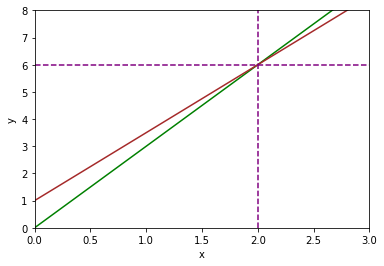

In [115]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0, 3])
ax.set_ylim([0, 8])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=6, color='purple', linestyle='--')

In the **Elimination** example, the two equations in the system are:
$$ 2x - 3y = 15 $$
$$ 4x + 10y = 14 $$

Both equations can be rearranged to isolate $y$. Starting with the first equation: 
$$ -3y = 15 - 2x $$
$$ y = \frac{15 - 2x}{-3} = -5 + \frac{2x}{3} $$

Then for the second equation: 
$$ 4x + 10y = 14 $$
$$ 2x + 5y = 7 $$
$$ 5y = 7 - 2x $$
$$ y = \frac{7 - 2x}{5} $$

In [116]:
y1 = -5 + (2*x)/3

In [117]:
y2 = (7-2*x)/5

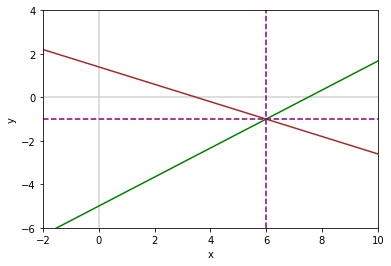

In [118]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

# Add x and y axes: 
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 10])
ax.set_ylim([-6, 4])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=6, color='purple', linestyle='--')
_ = plt.axhline(y=-1, color='purple', linestyle='--')

## Matrix Properties

### Frobenius Norm

In [119]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [120]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [121]:
np.linalg.norm(X) # same function as for vector L2 norm

5.477225575051661

In [122]:
X_pt = torch.tensor([[1, 2], [3, 4.]]) # torch.norm() supports floats only

In [123]:
torch.norm(X_pt)

tensor(5.4772)

In [124]:
X_tf = tf.Variable([[1, 2], [3, 4.]]) # tf.norm() also supports floats only

In [125]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

### Matrix Multiplication (with a Vector)

In [126]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [127]:
b = np.array([1, 2])
b

array([1, 2])

In [128]:
np.dot(A, b) # even though technically dot products are between vectors only

array([11, 17, 23])

In [129]:
A_pt = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [130]:
b_pt = torch.tensor([1, 2])
b_pt

tensor([1, 2])

In [131]:
torch.matmul(A_pt, b_pt) # like np.dot(), automatically infers dims in order to perform dot product, matvec, or matrix multiplication

tensor([11, 17, 23])

In [132]:
A_tf = tf.Variable([[3, 4], [5, 6], [7, 8]])
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]], dtype=int32)>

In [133]:
b_tf = tf.Variable([1, 2])
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

In [134]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23], dtype=int32)>

### Matrix Multiplication (with Two Matrices)

In [135]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [136]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [137]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

Note that matrix multiplication is not "commutative" (i.e., $AB \neq BA$) so uncommenting the following line will throw a size mismatch error:

In [138]:
# np.dot(B, A)

In [139]:
B_pt = torch.from_numpy(B) # much cleaner than TF conversion
B_pt

tensor([[1, 9],
        [2, 0]])

In [140]:
# another neat way to create the same tensor with transposition: 
B_pt = torch.tensor([[1, 2], [9, 0]]).T
B_pt

tensor([[1, 9],
        [2, 0]])

In [141]:
torch.matmul(A_pt, B_pt) # no need to change functions, unlike in TF

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [142]:
B_tf = tf.convert_to_tensor(B, dtype=tf.int32)
B_tf

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 9],
       [2, 0]], dtype=int32)>

In [143]:
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]], dtype=int32)>

### Symmetric Matrices

In [144]:
X_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [145]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [146]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Identity Matrices

In [147]:
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [148]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [149]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])

### Answers to Matrix Multiplication Qs

In [150]:
M_q = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
M_q

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [151]:
V_q = torch.tensor([[-1, 1, -2], [0, 1, 2]]).T
V_q

tensor([[-1,  0],
        [ 1,  1],
        [-2,  2]])

In [152]:
torch.matmul(M_q, V_q)

tensor([[ -3,   5],
        [ -9,  14],
        [-15,  23]])

### Matrix Inversion

In [153]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [154]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [155]:
y = np.array([4, -7])
y

array([ 4, -7])

In [156]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$: 

In [157]:
np.dot(X, w)

array([ 4., -7.])

**Geometric Visualization**

Consider these two equations in the system:
$$ 4b + 2c = 4 $$
$$ -5b - 3c = -7 $$

Both equations can be rearranged to isolate a variable, say $c$. Starting with the first equation: 
$$ 4b + 2c = 4 $$
$$ 2b + c = 2 $$
$$ c = 2 - 2b $$

Then for the second equation: 
$$ -5b - 3c = -7 $$
$$ -3c = -7 + 5b $$
$$ c = \frac{-7 + 5b}{-3} = \frac{7 - 5b}{3} $$

In [158]:
b = np.linspace(-10, 10, 1000) # start, finish, n points

In [159]:
c1 = 2 - 2*b

In [160]:
c2 = (7-5*b)/3

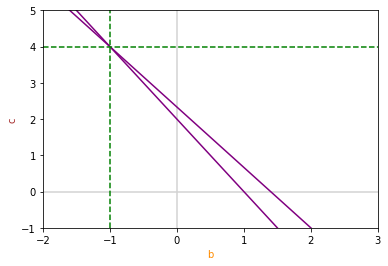

In [161]:
fig, ax = plt.subplots()
plt.xlabel('b', c='darkorange')
plt.ylabel('c', c='brown')

plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(b, c1, c='purple')
ax.plot(b, c2, c='purple')
plt.axvline(x=-1, color='green', linestyle='--')
_ = plt.axhline(y=4, color='green', linestyle='--')

In PyTorch and TensorFlow:

In [162]:
torch.inverse(torch.tensor([[4, 2], [-5, -3.]])) # float type

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [163]:
tf.linalg.inv(tf.Variable([[4, 2], [-5, -3.]])) # also float

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999999 ,  0.99999994],
       [-2.4999998 , -1.9999999 ]], dtype=float32)>

**Exercises**:

1. As done with NumPy above, use PyTorch to calculate $w$ from $X$ and $y$. Subsequently, confirm that $y = Xw$.
2. Repeat again, now using TensorFlow.

### Matrix Inversion Where No Solution

In [164]:
X = np.array([[-4, 1], [-8, 2]])
X

array([[-4,  1],
       [-8,  2]])

In [165]:
# Uncommenting the following line results in a "singular matrix" error
# Xinv = np.linalg.inv(X)

Feel free to try inverting a non-square matrix; this will throw an error too.

### Orthogonal Matrices

These are the solutions to Exercises 3 and 4 on **orthogonal matrices**.

For Exercise 3, to demonstrate the matrix $I_3$ has mutually orthogonal columns, we show that the dot product of any pair of columns is zero: 

In [166]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [167]:
column_1 = I[:,0]
column_1

array([1, 0, 0])

In [168]:
column_2 = I[:,1]
column_2

array([0, 1, 0])

In [169]:
column_3 = I[:,2]
column_3

array([0, 0, 1])

In [170]:
np.dot(column_1, column_2)

0

In [171]:
np.dot(column_1, column_3)

0

In [172]:
np.dot(column_2, column_3)

0

We can use the `np.linalg.norm()` method from earlier in the notebook to demonstrate that each column of $I_3$ has unit norm: 

In [173]:
np.linalg.norm(column_1)

1.0

In [174]:
np.linalg.norm(column_2)

1.0

In [175]:
np.linalg.norm(column_3)

1.0

Since the matrix $I_3$ has mutually orthogonal columns and each column has unit norm, the column vectors of $I_3$ are *orthonormal*. Since $I_3^T = I_3$, this means that the *rows* of $I_3$ must also be orthonormal. 

Since the columns and rows of $I_3$ are orthonormal, $I_3$ is an *orthogonal matrix*.

For Exercise 4, let's repeat the steps of Exercise 3 with matrix *K* instead of $I_3$. We could use NumPy again, but for fun I'll use PyTorch instead. (You're welcome to try it with TensorFlow if you feel so inclined.)

In [176]:
K = torch.tensor([[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3, 2/3, -2/3]])
K

tensor([[ 0.6667,  0.3333,  0.6667],
        [-0.6667,  0.6667,  0.3333],
        [ 0.3333,  0.6667, -0.6667]])

In [177]:
Kcol_1 = K[:,0]
Kcol_1

tensor([ 0.6667, -0.6667,  0.3333])

In [178]:
Kcol_2 = K[:,1]
Kcol_2

tensor([0.3333, 0.6667, 0.6667])

In [179]:
Kcol_3 = K[:,2]
Kcol_3

tensor([ 0.6667,  0.3333, -0.6667])

In [180]:
torch.dot(Kcol_1, Kcol_2)

tensor(0.)

In [181]:
torch.dot(Kcol_1, Kcol_3)

tensor(0.)

In [182]:
torch.dot(Kcol_2, Kcol_3)

tensor(0.)

We've now determined that the columns of $K$ are orthogonal.

In [183]:
torch.norm(Kcol_1)

tensor(1.)

In [184]:
torch.norm(Kcol_2)

tensor(1.)

In [185]:
torch.norm(Kcol_3)

tensor(1.)

We've now determined that, in addition to being orthogonal, the columns of $K$ have unit norm, therefore they are orthonormal. 

To ensure that $K$ is an orthogonal matrix, we would need to show that not only does it have orthonormal columns but it has orthonormal rows are as well. Since $K^T \neq K$, we can't prove this quite as straightforwardly as we did with $I_3$. 

One approach would be to repeat the steps we used to determine that $K$ has orthogonal columns with all of the matrix's rows (please feel free to do so). Alternatively, we can use an orthogonal matrix-specific equation, $A^TA = I$, to demonstrate that $K$ is orthogonal in a single line of code: 

In [186]:
torch.matmul(K.T, K)

tensor([[ 1.0000e+00, -3.3114e-09,  3.3114e-09],
        [-3.3114e-09,  1.0000e+00,  6.6227e-09],
        [ 3.3114e-09,  6.6227e-09,  1.0000e+00]])

Notwithstanding rounding errors that we can safely ignore, this confirms that $K^TK = I$ and therefore $K$ is an orthogonal matrix. 